In [48]:
import sympy as sp
from sympy.abc import a, b, c, d, e, f, g, h, t, T
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def interp_pol_seven(p):

  p1 = sp.diff(p, t) # Первая производная
  p2 = sp.diff(p1, t) # Вторая производная
  p3 = sp.diff(p2, t) # Третья производная

  p_in_0 = p.subs({t: 0}) # Значение полинома в точке 0
  p_in_T = p.subs({t: T}) # Значение полинома в точке T

  p1_in_0 = p1.subs({t: 0}) # Значение первой производной в точке 0
  p1_in_T = p1.subs({t: T}) # Значение первой производной в точке T
  p2_in_0 = p2.subs({t: 0}) # Значение второй производной в точке 0
  p2_in_T = p2.subs({t: T}) # Значение второй производной в точке T
  p3_in_0 = p3.subs({t: 0}) # Значение третьей производной в точке 0
  p3_in_T = p3.subs({t: T}) # Значение третьей производной в точке T

  cp, = sp.linsolve([p_in_0, p1_in_0, p2_in_0, p3_in_0, p1_in_T, p2_in_T, p3_in_T, p_in_T - 1], [a, b, c, d, e, f, g, h])

  pn = cp[0] + cp[1]*t + cp[2]*t**2 + cp[3]*t**3 + cp[4]*t**4 + cp[5]*t**5 + cp[6]*t**6 + cp[7]*t**7

  return pn

In [50]:
p_7 = a + b*t + c*(t**2) + d*(t**3) + e*(t**4) + f*(t**5) + g*(t**6) + h*(t**7)
pol_7 = interp_pol_seven(p_7)
pol_7

35*t**4/T**4 - 84*t**5/T**5 + 70*t**6/T**6 - 20*t**7/T**7

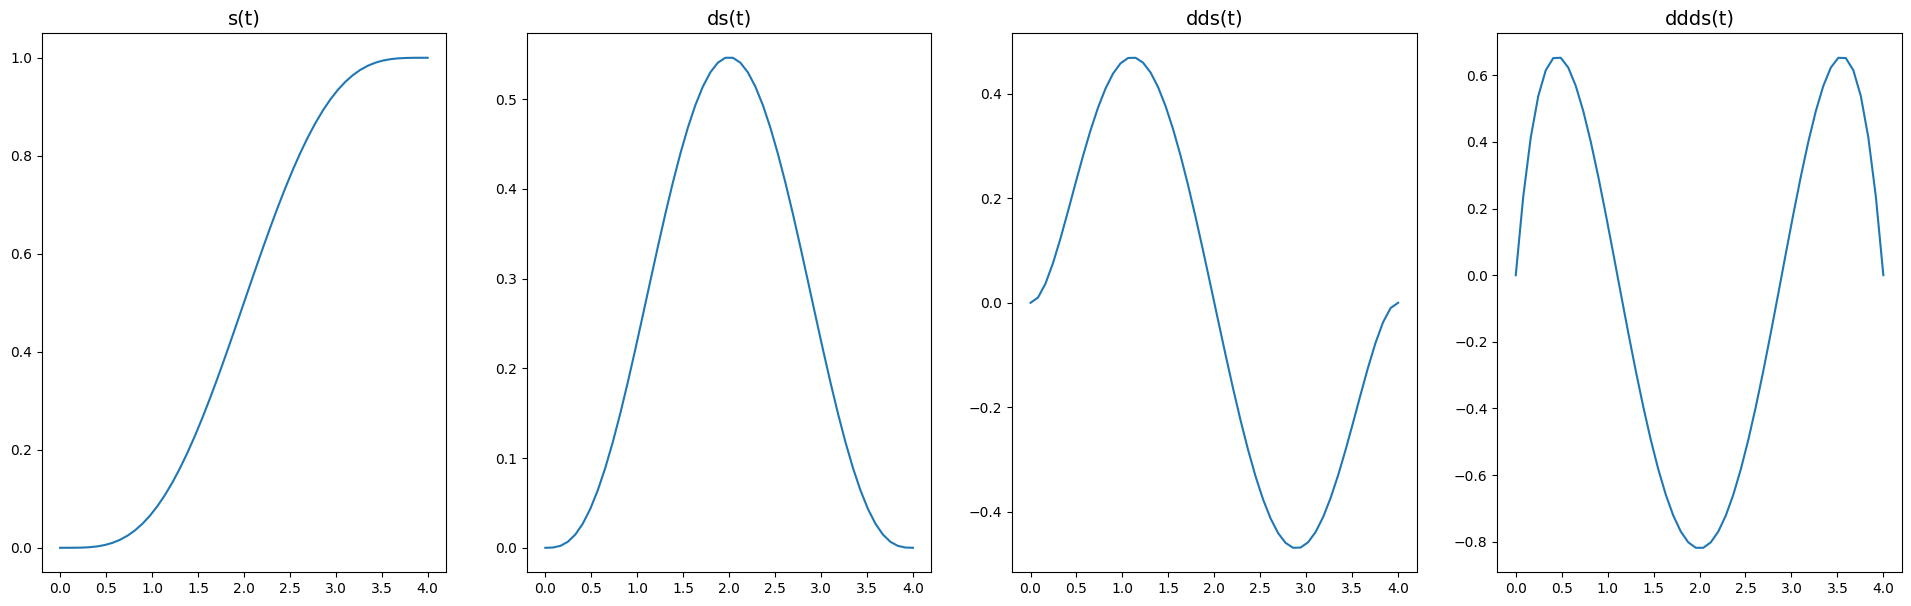

In [51]:
val_of_T = 4

pol_7_T = pol_7.subs({T: val_of_T})
pol_7_1 = sp.diff(pol_7_T, t)
pol_7_2 = sp.diff(pol_7_1, t)
pol_7_3 = sp.diff(pol_7_2, t)

func = sp.lambdify(t, pol_7_T)
func1 = sp.lambdify(t, pol_7_1)
func2 = sp.lambdify(t, pol_7_2)
func3 = sp.lambdify(t, pol_7_3)

time = np.linspace(0, val_of_T, 50)

S = []
S1 = []
S2 = []
S3 = []

for t in time:
  S.append(func(t))
  S1.append(func1(t))
  S2.append(func2(t))
  S3.append(func3(t))

plt.figure(figsize=(24, 7))

plt.subplot(1, 4, 1)
plt.plot(time, S)
plt.title('s(t)', fontsize=14)

plt.subplot(1, 4, 2)
plt.plot(time, S1)
plt.title('ds(t)', fontsize=14)

plt.subplot(1, 4, 3)
plt.plot(time, S2)
plt.title('dds(t)', fontsize=14)

plt.subplot(1, 4, 4)
plt.plot(time, S3)
plt.title('ddds(t)', fontsize=14)

plt.show()